<a href="https://colab.research.google.com/github/gerryfrank10/AI2025/blob/main/DPA_PHISHING_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the necessary libraries
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Downloading the dataset
import io, zipfile
url = 'https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip'
r = requests.get(url, headers=None, verify=False)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

/opt/anaconda3/envs/AI2025-2/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [3]:
!ls

AI_Lab_08_ANN_solutions.ipynb     lab8
Assignment                        lab9
custom_dataset_pizza.ipynb        main.ipynb
DPA_PHISHING_URL.ipynb            nanogpt
dpa-orange.html                   notebooks
lab1                              PhiUSIIL_Phishing_URL_Dataset.csv
lab2                              README.md
lab3                              Taster_NLP.ipynb
lab4                              test.ipynb
lab6                              train.csv


In [4]:
# Loading and print first 5 rows of data
data = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [5]:
# We have many columns let's see all columns
data.columns, len(data.columns), len(data)

(Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
        'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
        'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
        'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
        'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
        'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
        'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
        'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
        'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
        'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
        'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
        'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
        'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
        'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
        'NoOfE

> We have 56 columns (so many ...) we need to perform feature importance on the columns and determine the important features and the categorization using database normalisation

1. We are going to achieve this by grouping similar items together and form the tables our of them

In [6]:
# Sample one row from the dataset
# Create a random index
import random
random.seed(0)
rindex =  np.random.randint(0, len(data))
data.iloc[rindex]

,224426
FILENAME,380491.txt
URL,https://www.brittrust.co.uk
URLLength,26
Domain,www.brittrust.co.uk
DomainLength,19
IsDomainIP,0
TLD,uk
URLSimilarityIndex,100.0
CharContinuationRate,0.833333
TLDLegitimateProb,0.028555


## Exploratory Analysis
We are going to perform exploratory data analysis on the dataset by including the following steps
 - Checking Missing Values
 - Getting Important Features
 - Scaling and Normalization
 - Training and Testing Split
 -

In [7]:
# Getting Null Values
data.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


In [5]:
# Getting null Values (Other Method)
data.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

> There are no null values in the data

In [9]:
# Getting statistics
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [5]:
# Getting Unique Values
data.nunique()

FILENAME                      235795
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
L

<Axes: >

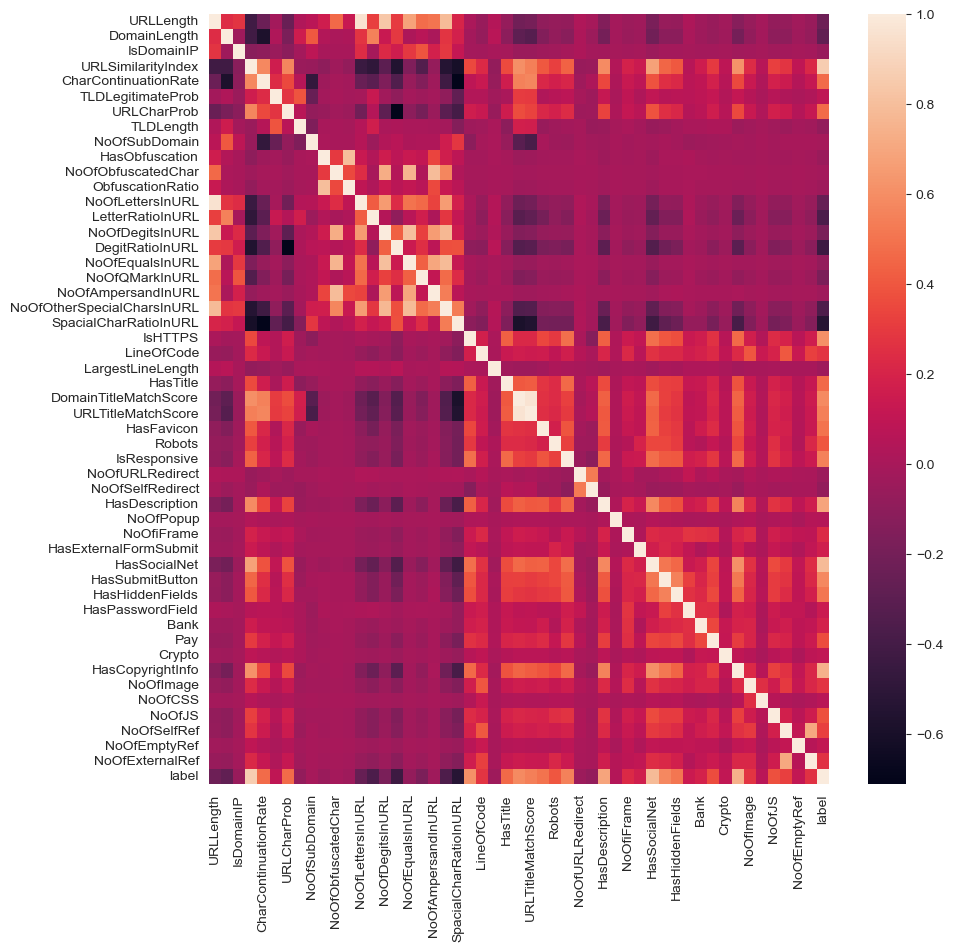

In [6]:
# Getting the correlation
import seaborn as sns
plt.figure(figsize=(10,10))
corr = data.corr(numeric_only=True)
sns.heatmap(corr)

In [6]:
# Getting Duplicates
data[data.duplicated(keep=False)]

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label


## Splitting the dataset to Train/Test split

In [7]:
from sklearn.model_selection import train_test_split

# Drop all object columns from data
data_copy = data
data_copy = data_copy.drop(['URL', 'FILENAME', 'TLD', 'Title', 'Domain'], axis=1)
X = data_copy.drop('label', axis=1)
y = data_copy['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(data_copy.info())
len(X_train), len(y_train), len(X_test), len(y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

(188636, 188636, 47159, 47159)

In [8]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
model = DecisionTreeClassifier()
start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end_time = time.time()
print(f'The accuracy of the model is {round(accuracy_score(y_test, y_pred), 2)} With training time of {round(end_time - start_time, 2)} seconds')
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

The accuracy of the model is 1.0 With training time of 0.33 seconds
1.0
1.0
1.0


> We have 100% accuracy by just training on all numerical datatypes

In [16]:
model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.86398090e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.32955351e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.11227485e-04, 1.31473869e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

The accuracy of the model is 1.0 With training time of 8.02 seconds
Accuracy score : 1.0
Precision score : 1.0
Recall score : 1.0
F1 score : 1.0


<Figure size 1200x1200 with 0 Axes>

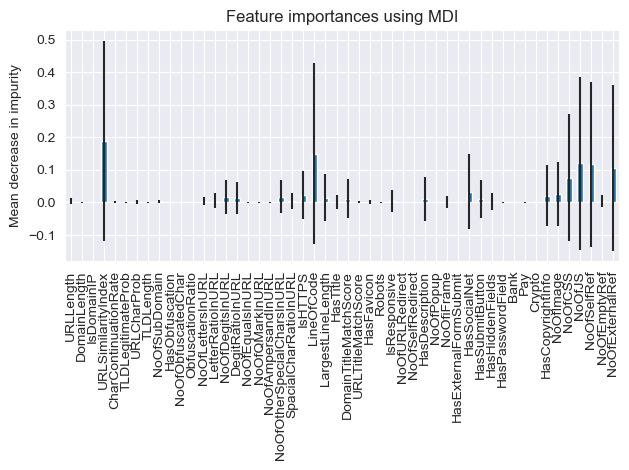

In [15]:
'''
Here we will be checking also USING RANDOM FOREST CLASSIFIER
'''

from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
start_time = time.time()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
end_time = time.time()
print(f'The accuracy of the model is {round(accuracy_score(y_test, y_pred), 2)} With training time of {round(end_time - start_time, 2)} seconds')
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')
print(f'Precision score : {precision_score(y_test, y_pred)}')
print(f'Recall score : {recall_score(y_test, y_pred)}')
print(f'F1 score : {f1_score(y_test, y_pred)}')

# Getting Important features from the model based on mean decrease on impurity
importances = model2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model2.estimators_], axis=0)
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plotting the important Features
plt.figure(figsize=(12,12))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [18]:
# TODO
# Perform Permutation based to determine the important features

## Dimensionality Reduction PCA

Before Performing PCA it's very important to scale and standardize the data
reference [here](https://builtin.com/machine-learning/pca-in-python)

In [19]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Performing PCA on the standardized data
from sklearn.decomposition import PCA
pca = PCA(.95)
X_pca = pca.fit_transform(X_scaled)

# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# pca_df['target'] = y
# pca_df.head()

In [21]:
# Visualizing 2D projection
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='viridis')

NameError: name 'pca_df' is not defined

<Figure size 1000x1000 with 0 Axes>

In [22]:
pca.explained_variance_ratio_, len(pca.explained_variance_ratio_)

(array([0.18352341, 0.09998379, 0.05441617, 0.04100544, 0.03736157,
        0.03624118, 0.03187331, 0.0296926 , 0.02764787, 0.02465573,
        0.0228263 , 0.02231026, 0.02136892, 0.02014194, 0.01988185,
        0.01946149, 0.01898615, 0.01758039, 0.01733158, 0.01683808,
        0.01547294, 0.01495337, 0.01456549, 0.01363845, 0.01328141,
        0.01288087, 0.01234437, 0.01199418, 0.01158762, 0.01119194,
        0.01084638, 0.01044137, 0.00912567, 0.0089394 , 0.00843041,
        0.00784496]),
 36)

In [23]:
pca.n_components_

np.int64(36)

## Neural Network

In [16]:
'''
Developing a neural network model using pytorch
'''
# Import necessary libraries
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [17]:
# Perform a forward pass
net = Net()
net(torch.FloatTensor(X_train.sample(n=1, random_state=42).to_numpy())) # We are obtaining one sample from the train data and performing foward pass on it

tensor([[-35.2466]], grad_fn=<AddmmBackward0>)

In [18]:
# Model training function
def train(model, optimiser, criterion, X_train, y_train, X_test, y_test, epochs=100):

  train_losses = []
  test_losses = []
  accuracies = []

  optimiser = torch.optim.Adam(model.parameters()) if optimiser is None else optimiser
  criterion = nn.BCELoss() if criterion is None else criterion

  # training mode
  model.train()
  for epoch in range(epochs):
    optimiser.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimiser.step()

    # Evaluation mode
    with torch.no_grad():
      model.eval()
      test_pred = model(X_test)
      test_loss = criterion(test_pred, y_test)
      test_probs = torch.sigmoid(test_pred)
      test_acc = (test_probs.round() == y_test).float().mean()

      if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Training Loss: {loss.item()}, Test Loss: {test_loss.item()}, Test Acc: {test_acc.item()}')
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        accuracies.append(test_acc.item())
  return train_losses, test_losses, accuracies

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the model
net = Net()

# Define optimiser and criterion
optimiser = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.to_numpy()).view(-1,1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test.to_numpy()).view(-1,1)

#Training
start_time = time.time()
train_losses, test_losses, test_accuracy = train(model=net,
      optimiser=optimiser,
      criterion=criterion,
      X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test
)
end_time = time.time()
print(f'Training time: {round(end_time - start_time, 2)} seconds')

Epoch: 0, Training Loss: 0.7018789052963257, Test Loss: 0.6813352108001709, Test Acc: 0.705888569355011
Epoch: 10, Training Loss: 0.4940555989742279, Test Loss: 0.46952372789382935, Test Acc: 0.9894399642944336
Epoch: 20, Training Loss: 0.24594946205615997, Test Loss: 0.22391143441200256, Test Acc: 0.9891431331634521
Epoch: 30, Training Loss: 0.09164637327194214, Test Loss: 0.08329539000988007, Test Acc: 0.9910515546798706
Epoch: 40, Training Loss: 0.039371952414512634, Test Loss: 0.03738261014223099, Test Acc: 0.9933416843414307
Epoch: 50, Training Loss: 0.022456808015704155, Test Loss: 0.022226501256227493, Test Acc: 0.9951016902923584
Epoch: 60, Training Loss: 0.015374144539237022, Test Loss: 0.01558168139308691, Test Acc: 0.9963739514350891
Epoch: 70, Training Loss: 0.01163415051996708, Test Loss: 0.011935307644307613, Test Acc: 0.9970525503158569
Epoch: 80, Training Loss: 0.009336157701909542, Test Loss: 0.009642357937991619, Test Acc: 0.9977098703384399
Epoch: 90, Training Loss: 

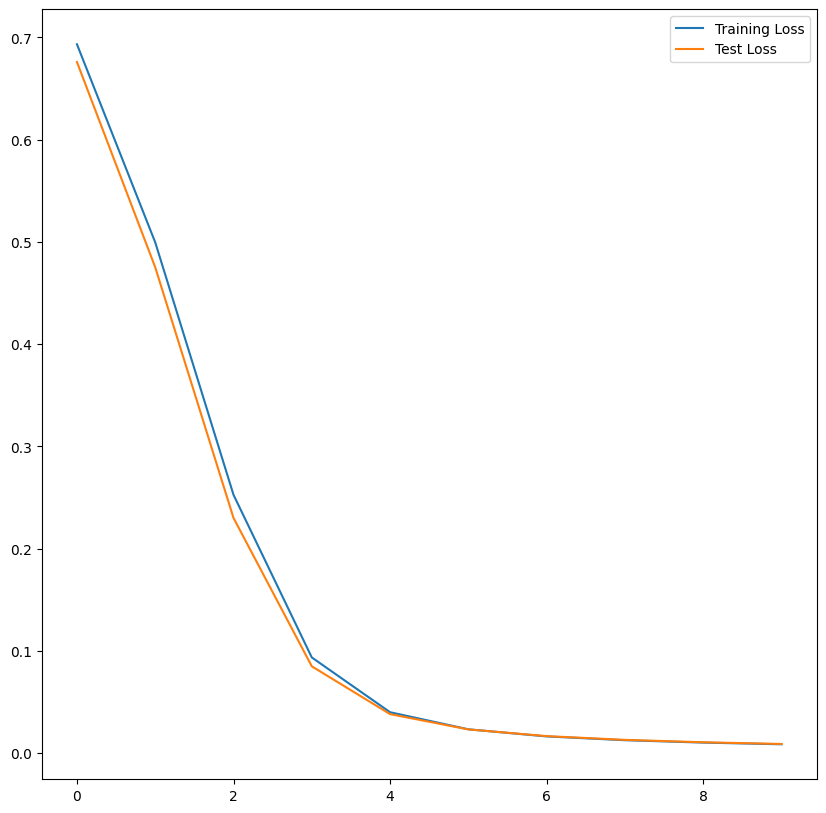

In [28]:
# Plotting the losses
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [30]:
from sklearn.decomposition import PCA

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA
pca = PCA(n_components=5)  # Adjust number of components as needed
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Initialize the model
net1 = Net()  # Ensure Net(input_size=10) if using 10 PCA components

# Define optimiser and criterion
optimiser = torch.optim.Adam(net1.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

# Convert to torch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.to_numpy()).view(-1,1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test.to_numpy()).view(-1,1)

# Training
start_time = time.time()
train_losses, test_losses, test_accuracy = train(
    model=net1,
    optimiser=optimiser,
    criterion=criterion,
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test
)
end_time = time.time()
print(f'Training time: {round(end_time - start_time, 2)} seconds')

Epoch: 0, Training Loss: 0.6158892512321472, Test Loss: 0.5706515312194824, Test Acc: 0.9169193506240845
Epoch: 10, Training Loss: 0.2802305221557617, Test Loss: 0.2574428617954254, Test Acc: 0.9873406887054443
Epoch: 20, Training Loss: 0.12243396043777466, Test Loss: 0.1134934052824974, Test Acc: 0.9879768490791321
Epoch: 30, Training Loss: 0.06327041238546371, Test Loss: 0.06083916500210762, Test Acc: 0.9888250231742859
Epoch: 40, Training Loss: 0.0423722118139267, Test Loss: 0.04229161888360977, Test Acc: 0.9893551468849182
Epoch: 50, Training Loss: 0.03397366404533386, Test Loss: 0.03476298972964287, Test Acc: 0.9897580742835999
Epoch: 60, Training Loss: 0.02997307851910591, Test Loss: 0.03113483265042305, Test Acc: 0.9901397228240967
Epoch: 70, Training Loss: 0.027720162644982338, Test Loss: 0.029078654944896698, Test Acc: 0.9904366135597229
Epoch: 80, Training Loss: 0.026243556290864944, Test Loss: 0.027725577354431152, Test Acc: 0.9906062483787537
Epoch: 90, Training Loss: 0.025

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 1.0


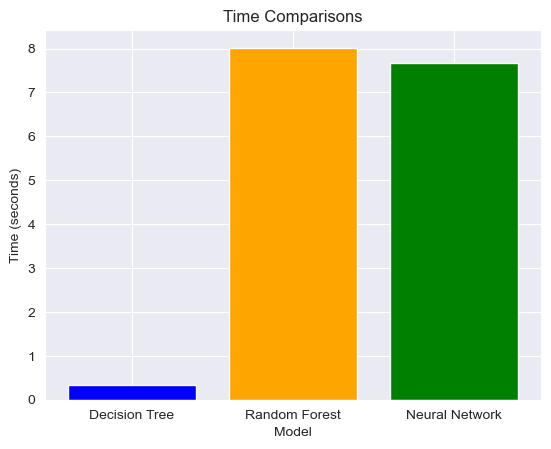

In [25]:
# plot time comparisons
plt.bar([0, 1, 2], [0.33,8.02, 7.68], color=['blue', 'orange', 'green'])
plt.title('Model Training Time')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.xticks([0, 1, 2], ['Decision Tree', 'Random Forest', 'Neural Network'])
plt.show()

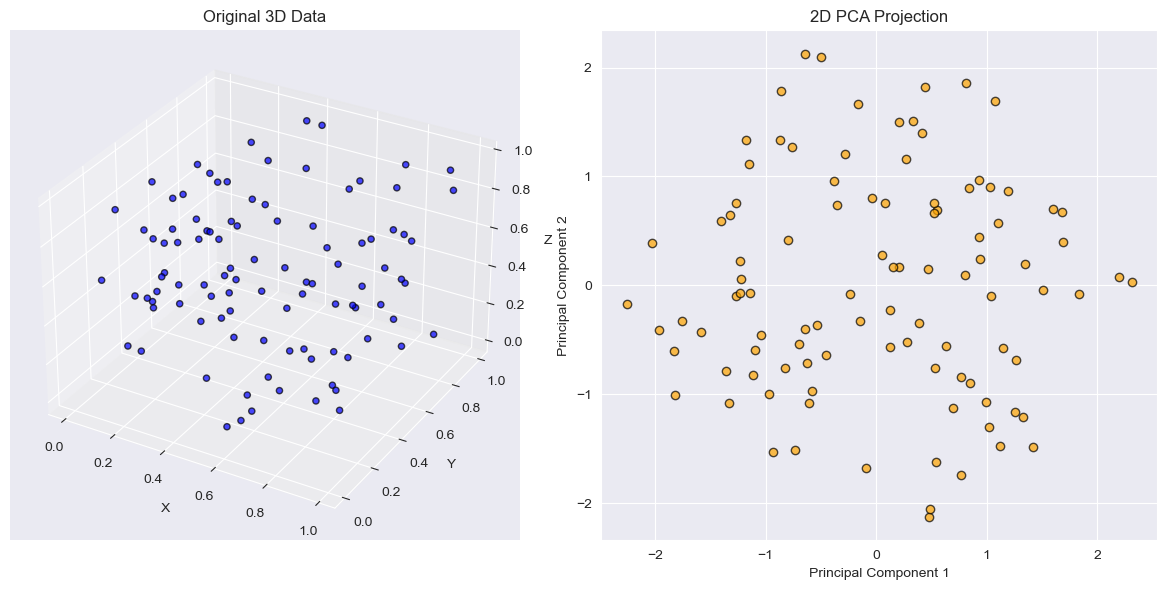

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Generate sample 3D data
np.random.seed(42)
data = np.random.rand(100, 3)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot the original 3D data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', edgecolor='k', alpha=0.7)
ax.set_title('Original 3D Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the 2D PCA projection
ax2 = fig.add_subplot(122)
ax2.scatter(data_pca[:, 0], data_pca[:, 1], c='orange', edgecolor='k', alpha=0.7)
ax2.set_title('2D PCA Projection')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

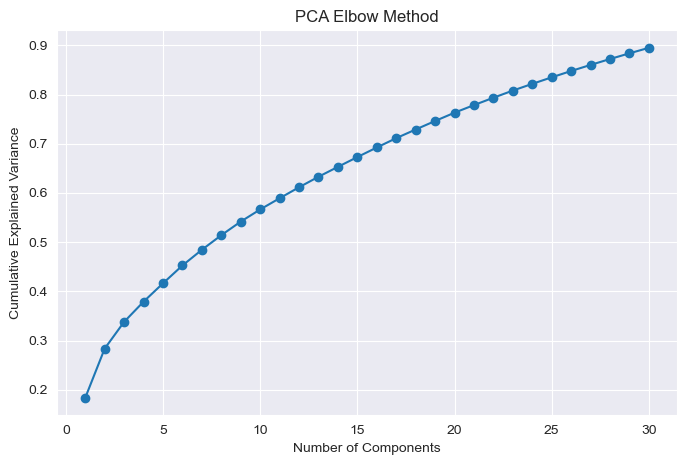

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with a large number of components
n_components = min(30, X_scaled.shape[1])  # Use up to 30 or number of features
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Method')
plt.grid(True)
plt.show()

In [16]:
'''
Implementation to determine the cumulative variance for different number of components
'''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

components_list = [5, 10, 20]

for n in components_list:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    print(f"Explained variance for n_components={n}: {cumulative_variance[-1]:.2f}")

Explained variance for n_components=5: 0.42
Explained variance for n_components=10: 0.57
Explained variance for n_components=20: 0.76
